In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('survey_data.csv')         

# Display the first few rows to verify loading
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Schedule ID  FSU Serial No.  Schedule  survey year  Sector  NSS-Region  \
0         TUS           32223       106         2024       1          11   
1         TUS           32223       106         2024       1          11   
2         TUS           32223       106         2024       1          11   
3         TUS           32223       106         2024       1          11   
4         TUS           32223       106         2024       1          11   

   District  Stratum  Sub-Stratum  Sub-Round  ...  \
0        21       13            1          2  ...   
1        21       13            1          2  ...   
2        21       13            1          2  ...   
3        21       13            1          2  ...   
4        21       13            1          2  ...   

   Primary source of energey for lighting  Type of washing of clothes  \
0                                     1.0                         2.0   
1                                     1.0        

In [4]:
# Display basic info about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139489 entries, 0 to 139488
Data columns (total 37 columns):
 #   Column                                                                                              Non-Null Count   Dtype  
---  ------                                                                                              --------------   -----  
 0   Schedule ID                                                                                         139489 non-null  object 
 1   FSU Serial No.                                                                                      139489 non-null  int64  
 2   Schedule                                                                                            139489 non-null  int64  
 3   survey year                                                                                         139489 non-null  int64  
 4   Sector                                                                                   

In [5]:
# Drop columns with more than 90% missing values
threshold = 0.9 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Fill missing numerical values with median
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

# Verify cleaning
print("\nShape after cleaning:", df_cleaned.shape)
print("\nMissing Values after cleaning:")
print(df_cleaned.isnull().sum())


Shape after cleaning: (139489, 35)

Missing Values after cleaning:
Schedule ID                                                                                           0
FSU Serial No.                                                                                        0
Schedule                                                                                              0
survey year                                                                                           0
Sector                                                                                                0
NSS-Region                                                                                            0
District                                                                                              0
Stratum                                                                                               0
Sub-Stratum                                                                                         

C:\Users\purwa\AppData\Local\Temp\ipykernel_7356\2058573899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())


In [6]:
# Get descriptive statistics
print("\nPrint cleaned Data:")
print(df_cleaned.describe())


Print cleaned Data:
       FSU Serial No.  Schedule  survey year         Sector     NSS-Region  \
count   139489.000000  139489.0     139489.0  139489.000000  139489.000000   
mean     46374.230864     106.0       2024.0       1.403200     192.465972   
std      14703.290452       0.0          0.0       0.490542      94.077912   
min      30010.000000     106.0       2024.0       1.000000      11.000000   
25%      33650.000000     106.0       2024.0       1.000000      95.000000   
50%      36930.000000     106.0       2024.0       1.000000     195.000000   
75%      63186.000000     106.0       2024.0       2.000000     274.000000   
max      66999.000000     106.0       2024.0       2.000000     371.000000   

            District        Stratum    Sub-Stratum      Sub-Round  \
count  139489.000000  139489.000000  139489.000000  139489.000000   
mean       16.730559      16.671121       9.764942       2.501065   
std        13.747657      15.758972      13.128614       1.118169   


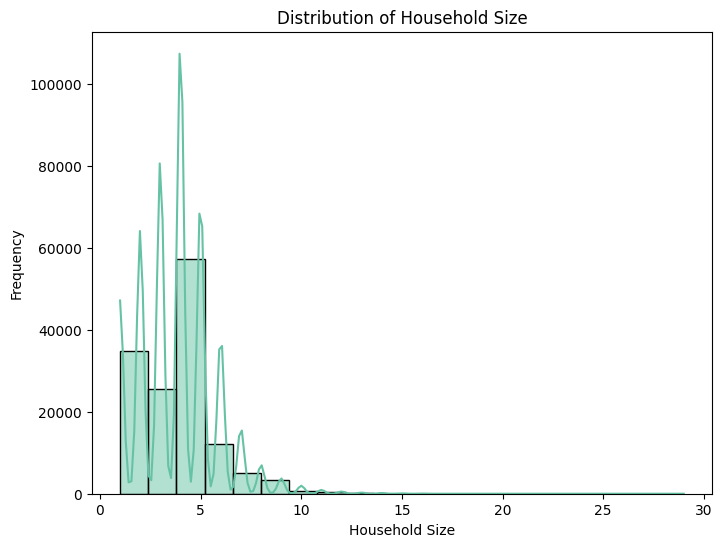

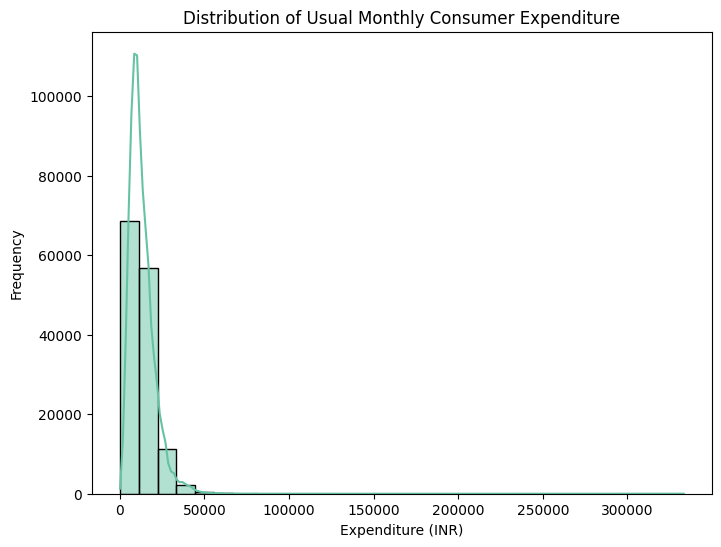

In [7]:


# Check for duplicates
sns.set_palette("Set2")
plt.figure(figsize=(8, 6))
sns.histplot(df['Household size'], bins=20, kde=True)
plt.title('Distribution of Household Size')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.show()

# Histogram for usual monthly consumer expenditure
plt.figure(figsize=(8, 6))
sns.histplot(df['usual monthly consumer expenditure E: [A+B+C+(D+E)/12]'], bins=30, kde=True)
plt.title('Distribution of Usual Monthly Consumer Expenditure')
plt.xlabel('Expenditure (INR)')
plt.ylabel('Frequency')
plt.show()

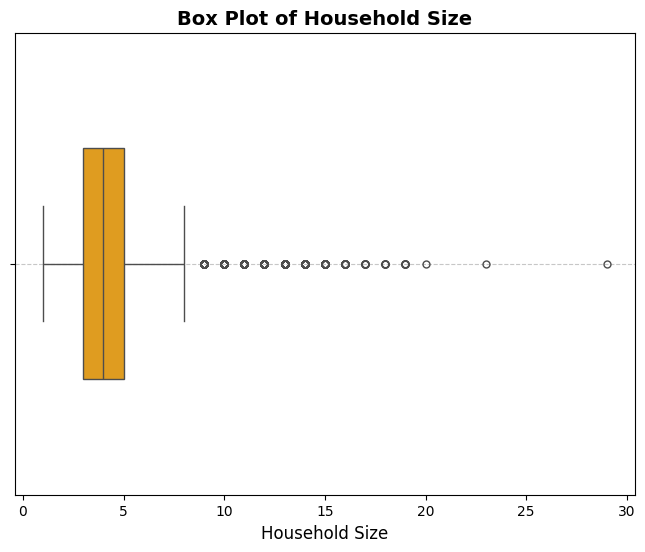

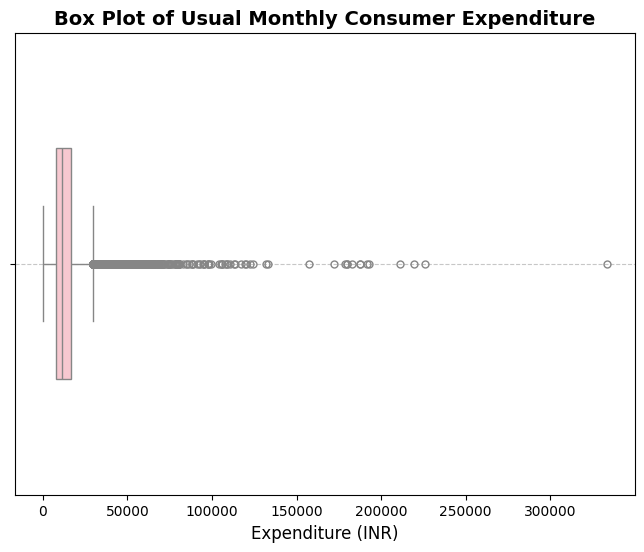

In [8]:
# Box plot for Household size
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Household size'], color='Orange', width=0.5, flierprops={'marker': 'o', 'color': 'red', 'markersize': 5})
plt.title('Box Plot of Household Size', fontsize=14, fontweight='bold')
plt.xlabel('Household Size', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot for usual monthly consumer expenditure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['usual monthly consumer expenditure E: [A+B+C+(D+E)/12]'], color='pink', width=0.5, flierprops={'marker': 'o', 'color': 'red', 'markersize': 5})
plt.title('Box Plot of Usual Monthly Consumer Expenditure', fontsize=14, fontweight='bold')
plt.xlabel('Expenditure (INR)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

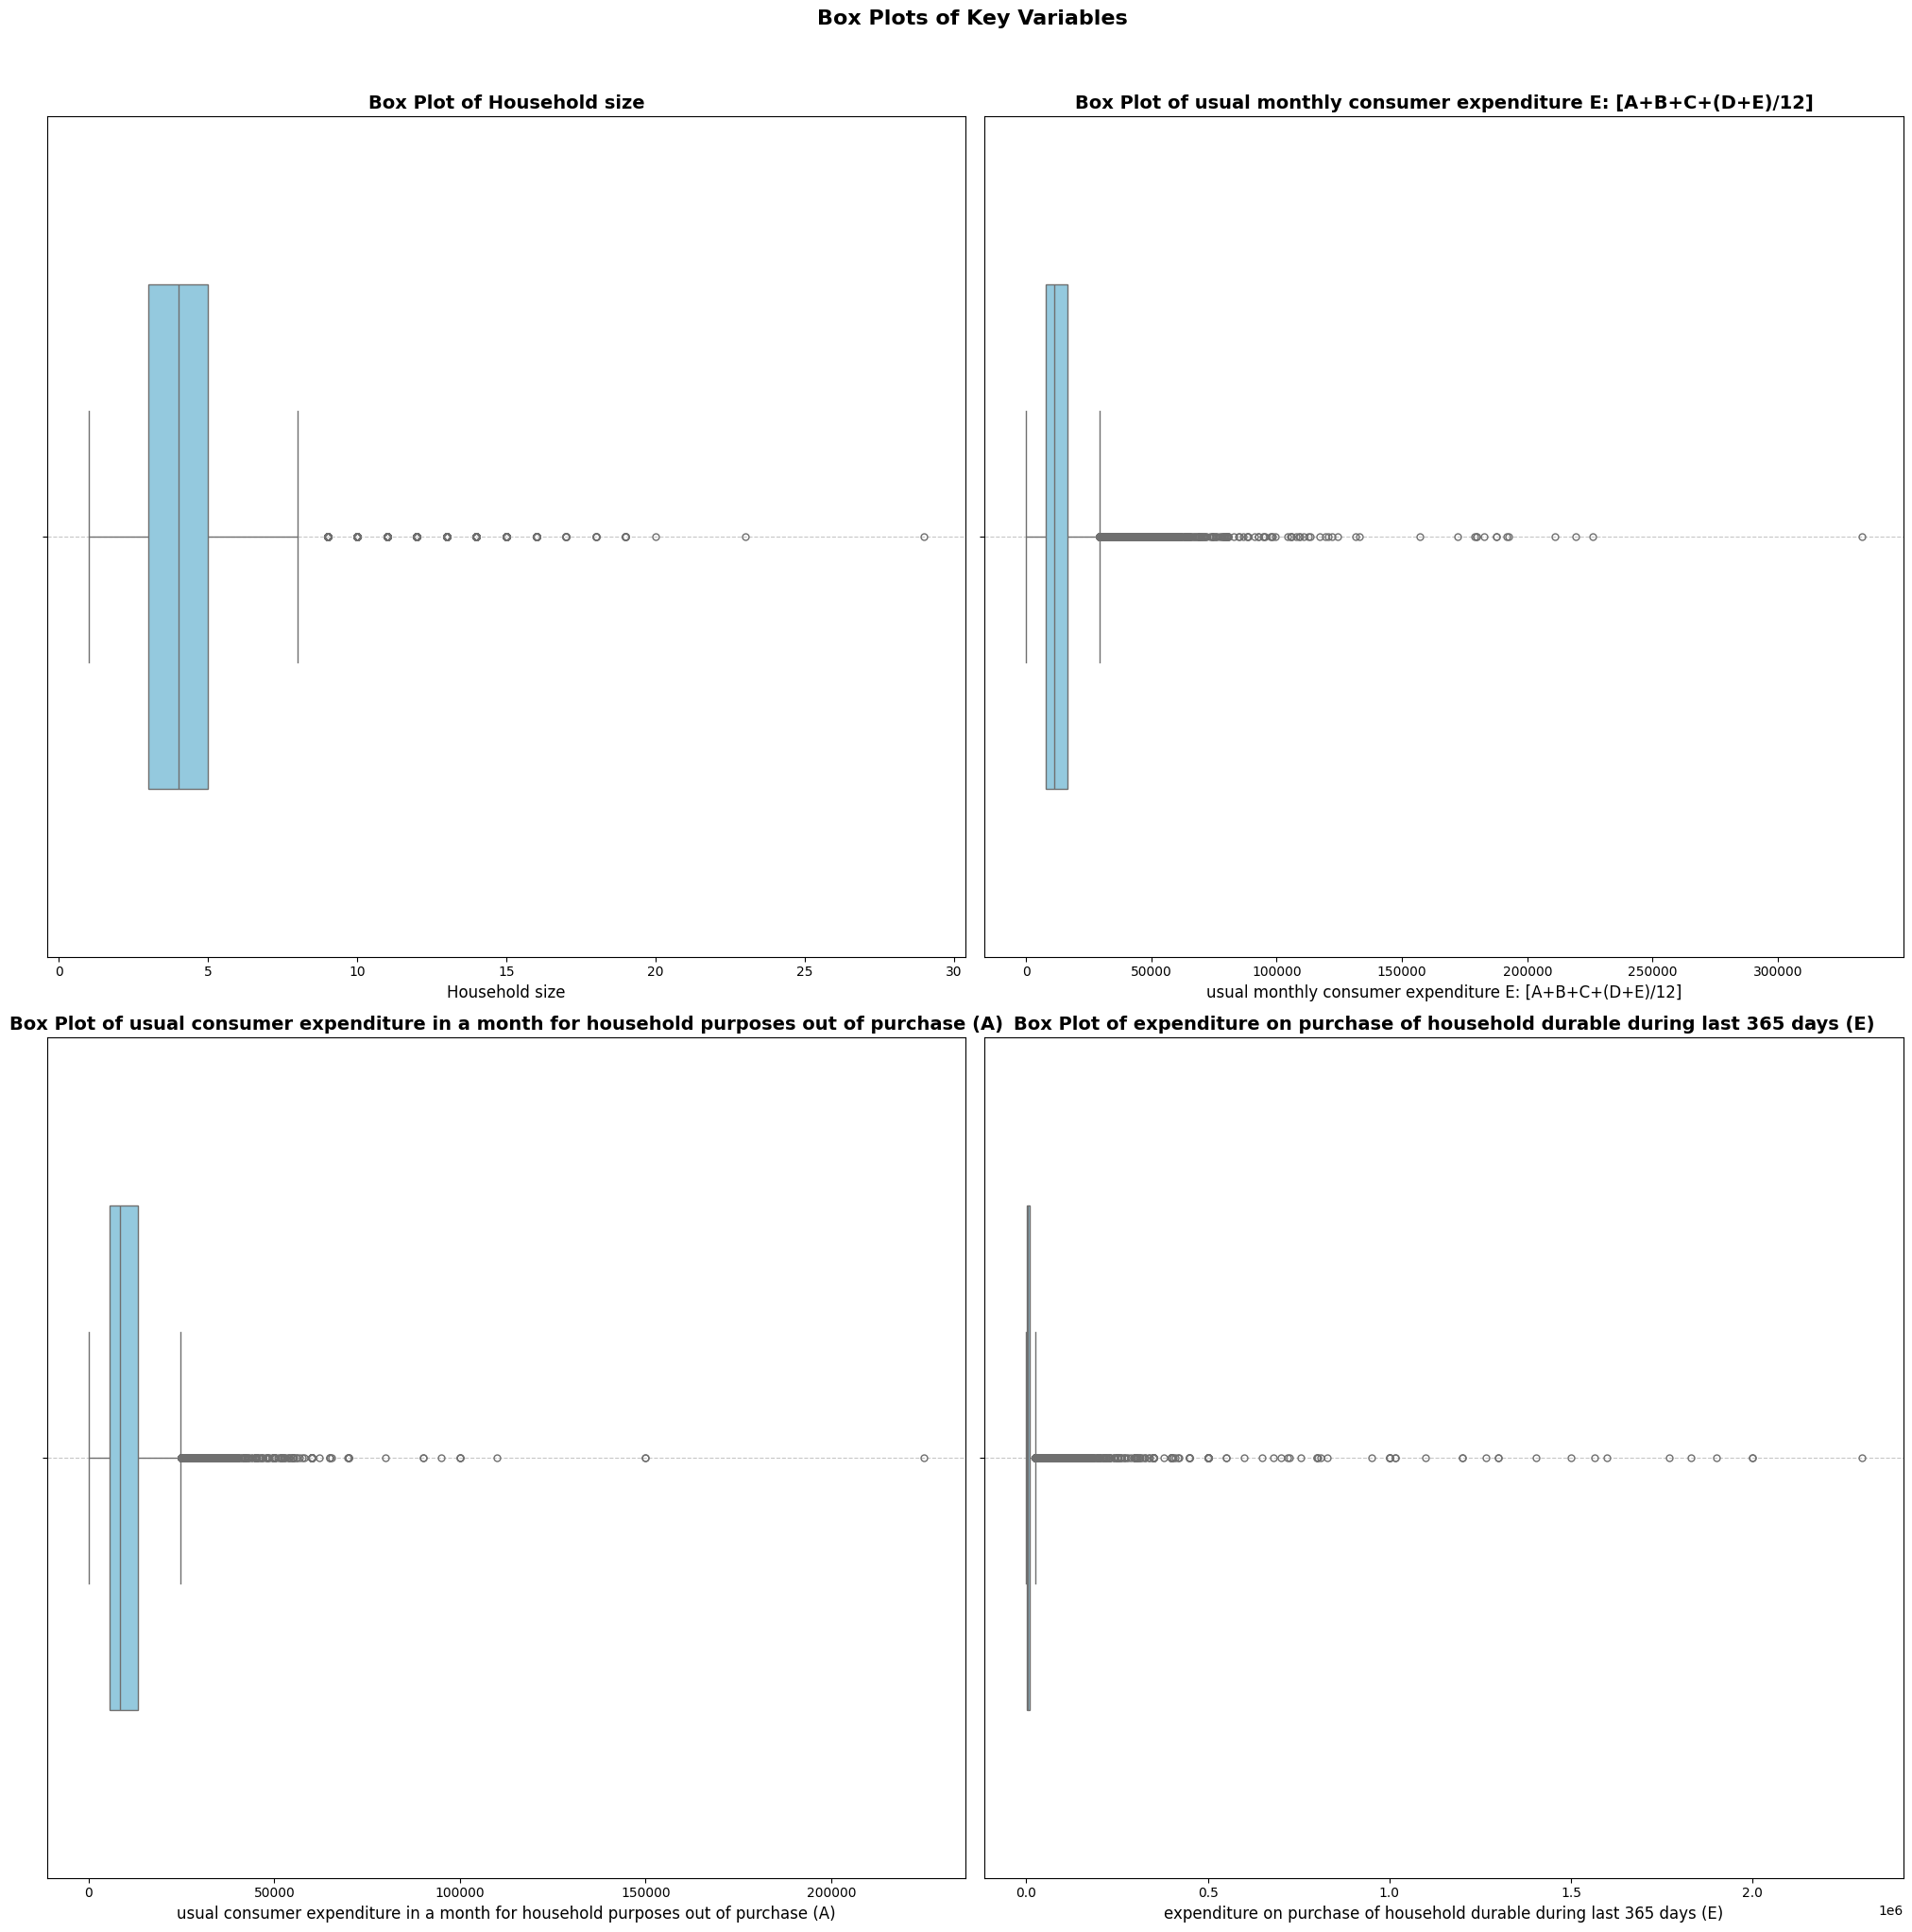

In [9]:
# List of variables to analyze for outliers
variables = [
    'Household size',
    'usual monthly consumer expenditure E: [A+B+C+(D+E)/12]',
    'usual consumer expenditure in a month for household purposes out of purchase (A)',
    'expenditure on purchase of household durable during last 365 days (E)'
]

# Create box plots for each variable with enhanced styling
plt.figure(figsize=(20, 20))  # Larger figure to accommodate enhancements
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    sns.boxplot(x=df[var], color='skyblue', width=0.6, flierprops={'marker': 'o', 'color': 'red', 'markersize': 5})
    plt.title(f'Box Plot of {var}', fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a main title for the entire figure
plt.suptitle('Box Plots of Key Variables', fontsize=16, fontweight='bold', y=1.02)

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

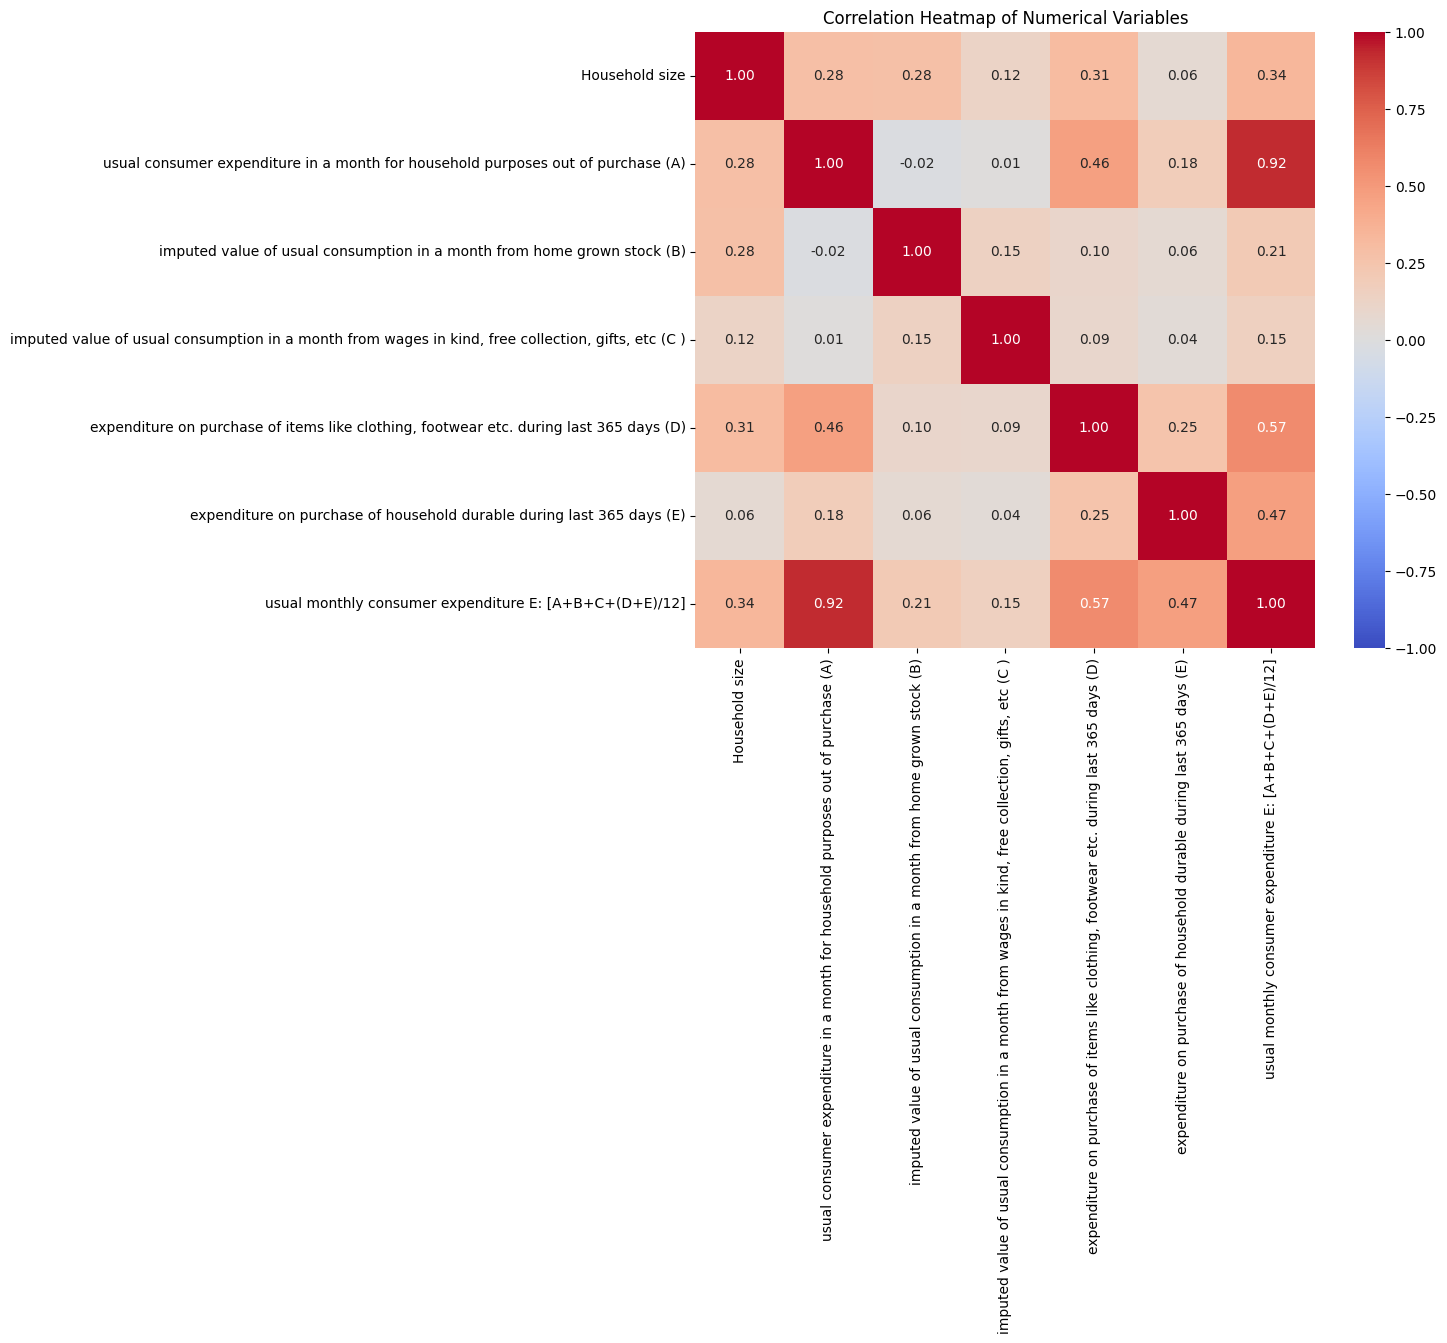

In [10]:
corr_cols = [
    'Household size',
    'usual consumer expenditure in a month for household purposes out of purchase (A)',
    'imputed value of usual consumption in a month from home grown stock (B)',
    'imputed value of usual consumption in a month from wages in kind, free collection, gifts, etc (C )',
    'expenditure on purchase of items like clothing, footwear etc. during last 365 days (D)',
    'expenditure on purchase of household durable during last 365 days (E)',
    'usual monthly consumer expenditure E: [A+B+C+(D+E)/12]'
]

# Step 4: Compute the correlation matrix
corr_matrix = df[corr_cols].corr()

# Step 5: Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

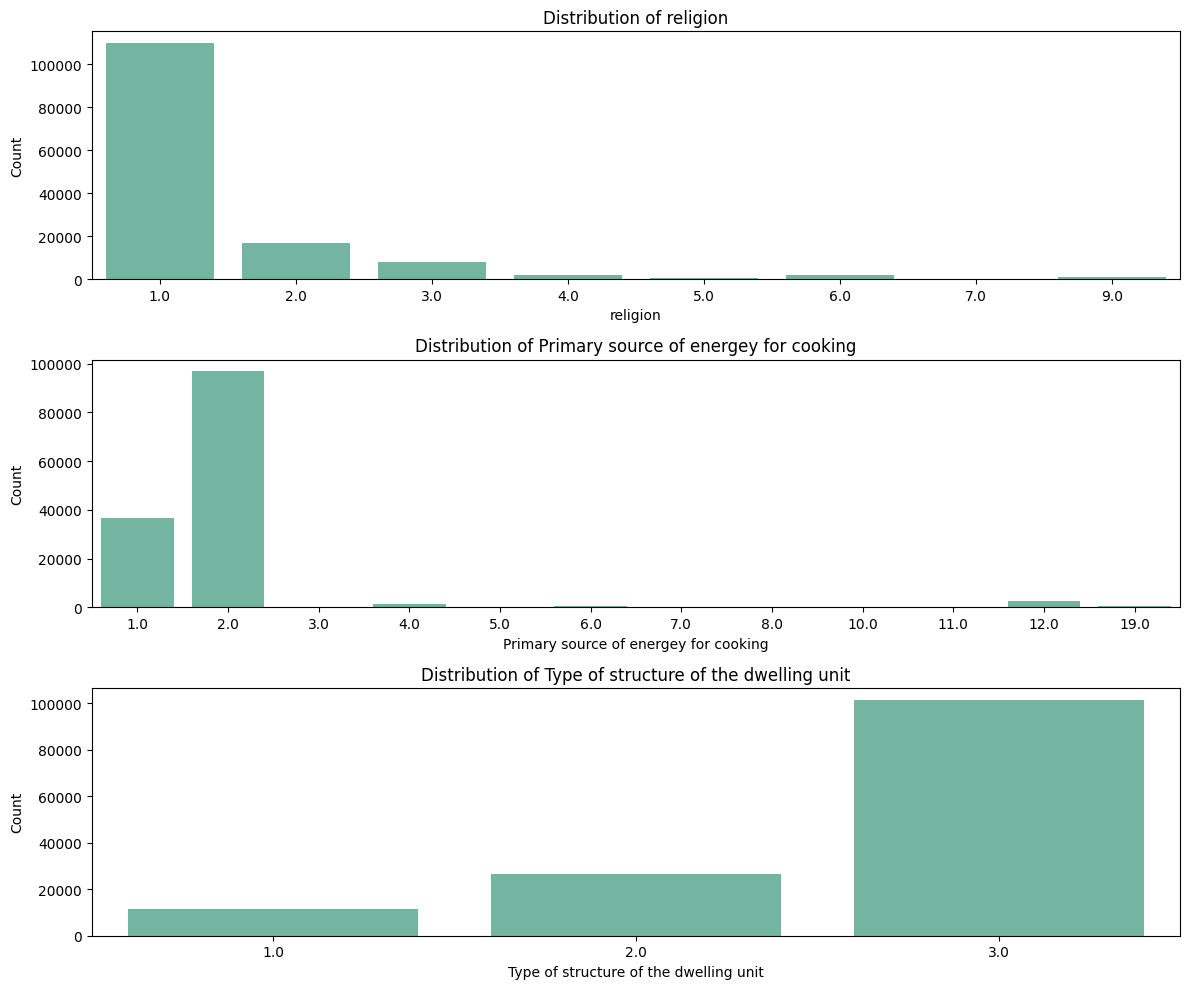

In [11]:
cat_vars = [
    'religion',
    'Primary source of energey for cooking',
    'Type of structure of the dwelling unit'
]

# Create count plots for each categorical variable
plt.figure(figsize=(12, 10))  # Larger figure to accommodate multiple plots
for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 1, i)  # 3x1 grid of subplots
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [12]:
# Basic cleaning before saving
# Drop columns with >90% missing values (e.g., care giver availability)
threshold = 0.9 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Fill missing numerical values with median
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

# Fill missing categorical values with mode (most frequent value)
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Verify the cleaned dataset
print("shape of our cleaned dataset:", df_cleaned.shape)
print("\nMissing Values after cleaning:")
print(df_cleaned.isnull().sum())

# Save the cleaned dataset
df_cleaned.to_csv('survey_data_cleaned.csv', index=False)
print("\nThe cleaned dataset is saved as 'survey_data_cleaned.csv'. Ready for your next adventure!")

C:\Users\purwa\AppData\Local\Temp\ipykernel_7356\1736923178.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())
C:\Users\purwa\AppData\Local\Temp\ipykernel_7356\1736923178.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


shape of our cleaned dataset: (139489, 35)

Missing Values after cleaning:
Schedule ID                                                                                           0
FSU Serial No.                                                                                        0
Schedule                                                                                              0
survey year                                                                                           0
Sector                                                                                                0
NSS-Region                                                                                            0
District                                                                                              0
Stratum                                                                                               0
Sub-Stratum                                                                                  

C:\Users\purwa\AppData\Local\Temp\ipykernel_7356\110417939.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Social group ', y='usual monthly consumer expenditure E: [A+B+C+(D+E)/12]',
C:\Users\purwa\AppData\Local\Temp\ipykernel_7356\110417939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Social group ', y='usual monthly consumer expenditure E: [A+B+C+(D+E)/12]',


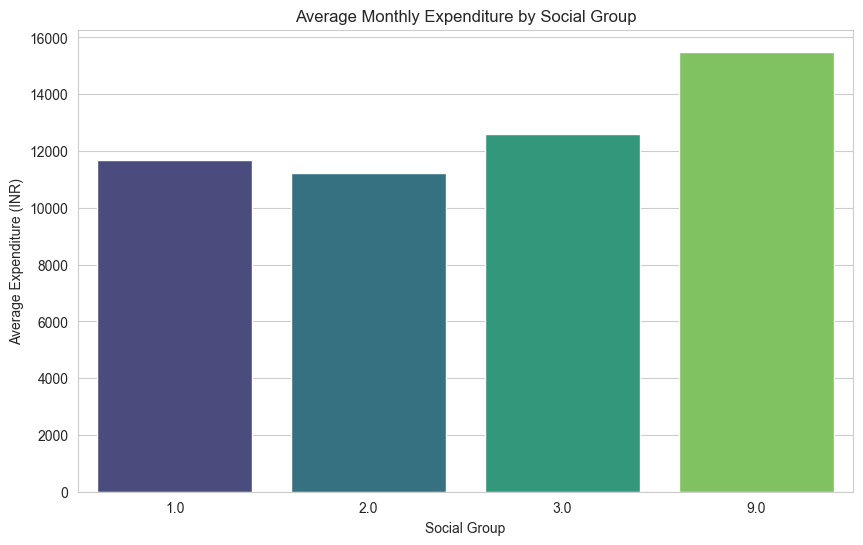

In [13]:
sns.set_style('whitegrid')

# 1. Bar Chart: Average Expenditure by Social Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Social group ', y='usual monthly consumer expenditure E: [A+B+C+(D+E)/12]', 
            data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Monthly Expenditure by Social Group')
plt.xlabel('Social Group')
plt.ylabel('Average Expenditure (INR)')
plt.show()

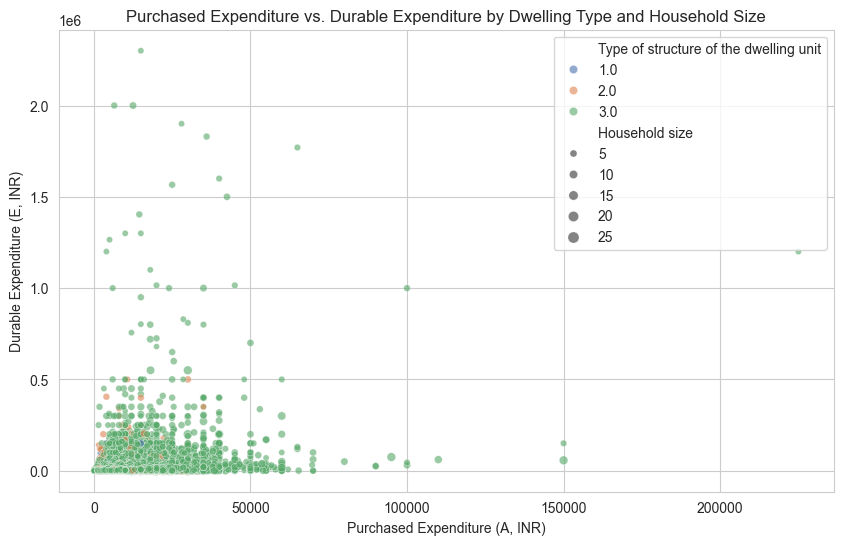

In [14]:
# Scatter Plot: Purchased Expenditure (A) vs. Durable Expenditure (E)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='usual consumer expenditure in a month for household purposes out of purchase (A)', 
                y='expenditure on purchase of household durable during last 365 days (E)', 
                hue='Type of structure of the dwelling unit', size='Household size', 
                data=df, alpha=0.6, palette='deep')
plt.title('Purchased Expenditure vs. Durable Expenditure by Dwelling Type and Household Size')
plt.xlabel('Purchased Expenditure (A, INR)')
plt.ylabel('Durable Expenditure (E, INR)')
plt.show()

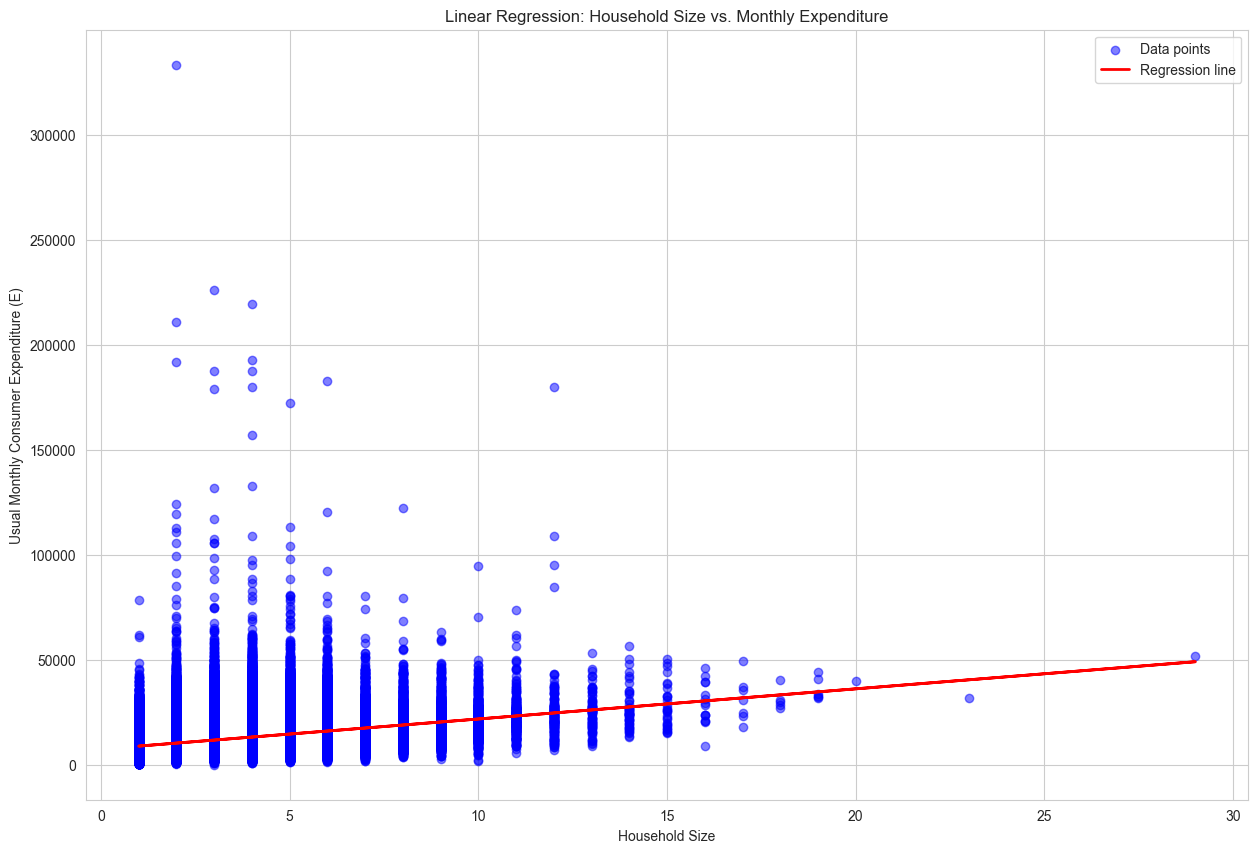

Slope (coefficient): 1434.98
Intercept: 7524.97
R-squared score: 0.1173


In [15]:
# Import sklearn for linear regression
from sklearn.linear_model import LinearRegression

# Select the variables for regression
X = df['Household size'].dropna()  # Independent variable
y = df['usual monthly consumer expenditure E: [A+B+C+(D+E)/12]'].dropna()  # Dependent variable

# Ensure X and y have the same length by aligning them (drop rows with NaN in either)
df_clean = df[['Household size', 'usual monthly consumer expenditure E: [A+B+C+(D+E)/12]']].dropna()
X = df_clean['Household size'].values.reshape(-1, 1)  # Reshape to 2D array for sklearn
y = df_clean['usual monthly consumer expenditure E: [A+B+C+(D+E)/12]'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression line predictions
y_pred = model.predict(X)

# Plot the scatter plot with regression line
plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')  # Scatter plot of actual data
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')  # Regression line
plt.xlabel('Household Size')
plt.ylabel('Usual Monthly Consumer Expenditure (E)')
plt.title('Linear Regression: Household Size vs. Monthly Expenditure')
plt.legend()
plt.grid(True)
plt.show()

# Print model details
print(f"Slope (coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared score: {model.score(X, y):.4f}")

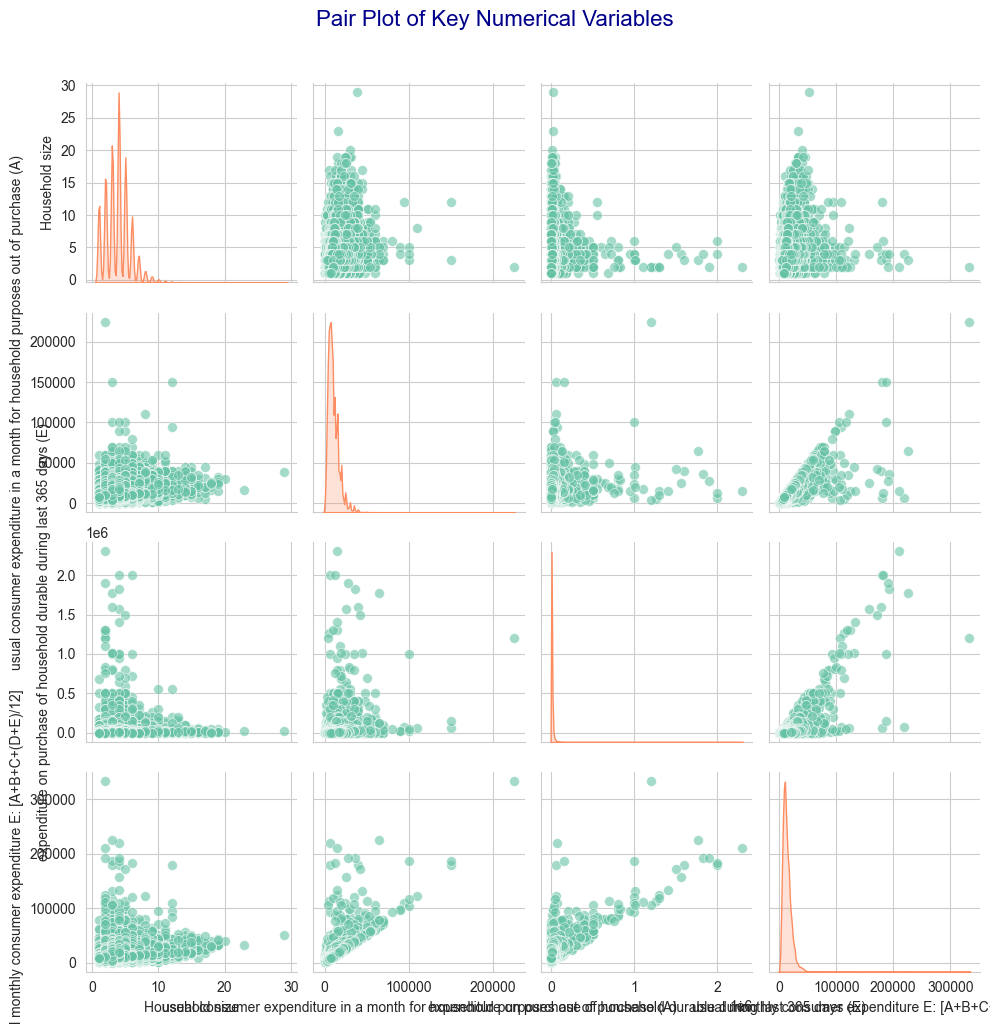

In [16]:

# Pair Plot: Relationships Between Key Numerical Variables
key_nums = ['Household size', 
            'usual consumer expenditure in a month for household purposes out of purchase (A)', 
            'expenditure on purchase of household durable during last 365 days (E)', 
            'usual monthly consumer expenditure E: [A+B+C+(D+E)/12]']

# Set Seaborn style for a clean look
sns.set_style("whitegrid")

# Define a custom color palette
custom_palette = sns.color_palette("Set2", 4)  # Vibrant and distinct colors for 4 variables

# Create pair plot with enhanced styling
g = sns.pairplot(
    df[key_nums],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 50, 'color': custom_palette[0]},  # Scatter plot styling
    diag_kws={'color': custom_palette[1], 'fill': True},  # KDE plot styling
    height=2.5  # Adjust size of individual plots
)

# Customize the title
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02, fontsize=16, color='darkblue')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()